In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
dataset_train= pd.read_csv('Google_Stock_Train.csv')

In [3]:
dataset_train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
5,2010-01-11,15.126627,15.126627,14.865866,15.042793,15.042793,288227484
6,2010-01-12,14.956206,14.968969,14.714715,14.776777,14.776777,193937868
7,2010-01-13,14.426677,14.724224,14.361862,14.691942,14.691942,259604136
8,2010-01-14,14.612112,14.869870,14.584835,14.761011,14.761011,169434396
9,2010-01-15,14.848348,14.853854,14.465465,14.514515,14.514515,217162620


In [4]:
training_set= dataset_train.iloc[:, 1:2].values

In [5]:
training_set

array([[15.689439],
       [15.695195],
       [15.662162],
       ...,
       [86.980003],
       [86.620003],
       [86.980003]])

In [6]:
training_set.shape

(3272, 1)

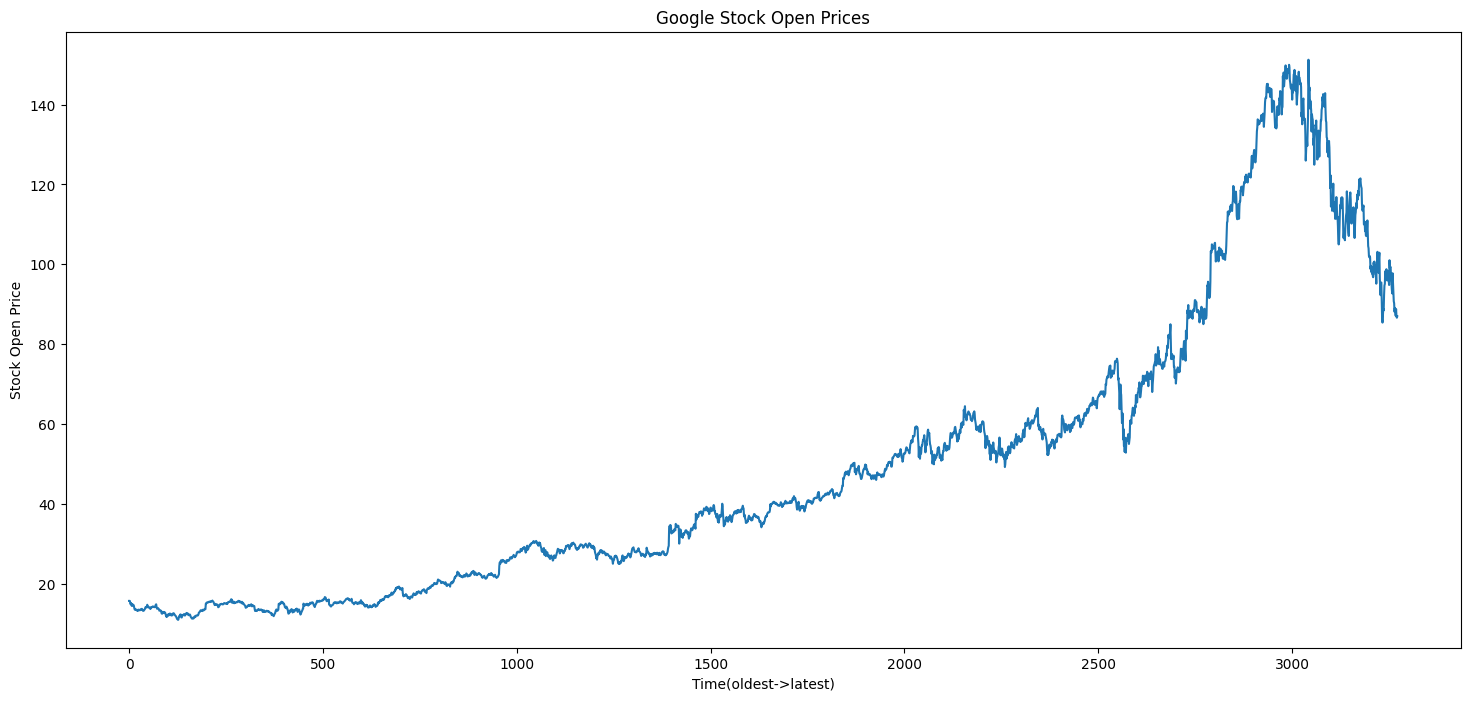

In [7]:
plt.figure(figsize=(18,8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time(oldest->latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [8]:
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)

In [9]:
X_train= []
y_train= []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train= np.array(X_train), np.array(y_train)

In [10]:
X_train[0]

array([0.03365182, 0.03369285, 0.03345737, 0.03052104, 0.02741703,
       0.02963979, 0.02842494, 0.02465017, 0.02597205, 0.02765607,
       0.0254904 , 0.02634311, 0.02589   , 0.02251126, 0.01931626,
       0.01777852, 0.01836721, 0.01894164, 0.01787129, 0.01717734,
       0.01724156, 0.01611948, 0.01760548, 0.01607131, 0.01680272,
       0.0180586 , 0.01708279, 0.016949  , 0.01688657, 0.01758229,
       0.01849744, 0.01770181, 0.01823521, 0.01945183, 0.01867583,
       0.01706674, 0.01584297, 0.01589649, 0.01621402, 0.01733432,
       0.01856166, 0.0193002 , 0.02194932, 0.02256121, 0.02168173,
       0.02237924, 0.02425236, 0.02672843, 0.02290015, 0.02203495,
       0.02318915, 0.0225505 , 0.02170849, 0.02101455, 0.02118045,
       0.01912359, 0.02153366, 0.02264862, 0.02224367, 0.02221334])

In [11]:
y_train[0]

np.float64(0.02260936724693867)

In [12]:
X_train= np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape

(3212, 60, 1)

In [14]:
from tensorflow.keras.layers import Input

regressor = Sequential()
regressor.add(Input(shape=(X_train.shape[1], 1)))  # Input layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))

regressor.add(LSTM(units=50, return_sequences=False))
regressor.add(Dropout(rate=0.2))

regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
regressor.fit(x=X_train, y=y_train, batch_size=32, epochs=10)

Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - loss: 8.9174e-04
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - loss: 6.9215e-04
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 7.5149e-04
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - loss: 6.3109e-04
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - loss: 7.3131e-04
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - loss: 7.2785e-04
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 7.3555e-04
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - loss: 6.4830e-04
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - loss: 7.4758e-04
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 7.3946e-04


In [18]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213,155 (832.64 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 142,104 (555.10 KB)

In [19]:
dataset_test= pd.read_csv('Google_Stock_Test.csv')

In [20]:
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [21]:
dataset_total= pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0)
inputs= dataset_total[len(dataset_total)-len(dataset_test) -60:].values

In [22]:
inputs= inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [23]:
len(inputs)

203

In [24]:
X_test= []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test= np.array(X_test)
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
X_test.shape

(143, 60, 1)

In [26]:
predicted_stock_price= regressor.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step


In [33]:
predicted_stock_price= sc.inverse_transform(predicted_stock_price)
real_stock_price = dataset_test.iloc[:, 1:2].values   # the “Open” column as a (n×1) array
real_stock_price = dataset_test['Open'].values

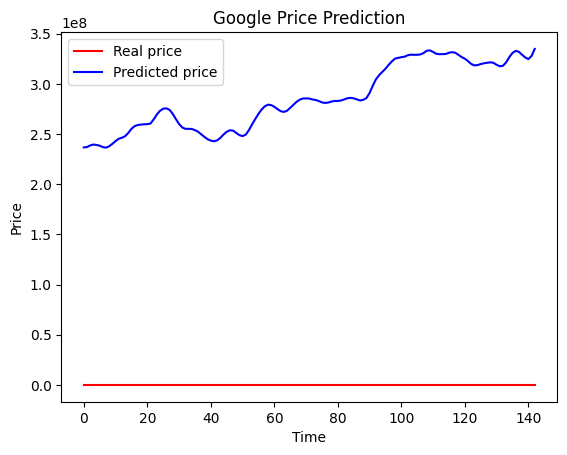

In [34]:
plt.plot(real_stock_price, color='red', label='Real price')
plt.plot(predicted_stock_price, color='blue', label='Predicted price')
plt.title('Google Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 19s 114ms/step - loss: 0.0211
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - loss: 0.0020
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - loss: 0.0022
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 0.0018
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - loss: 0.0020
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 0.0015
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - loss: 0.0018
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - loss: 0.0013
Epoch 9/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - loss: 0.0016
Epoch 10/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - loss: 0.0014
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step


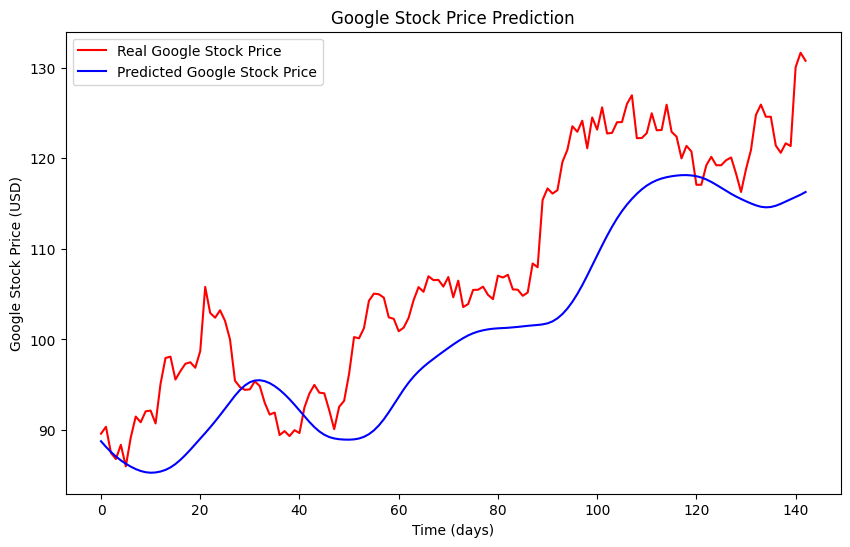

In [4]:
# ─── 1. IMPORT LIBRARIES ─────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# ─── 2. LOAD AND SCALE TRAINING DATA ─────────────────────────────────────────────
#   assumes Google_Stock_Price_Train.csv has “Date” and “Open” columns
dataset_train = pd.read_csv('Google_Stock_Train.csv')
training_set = dataset_train[['Open']].values  # shape (n_train, 1)

sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# create time-series data structure: 60 timesteps → next-day price
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,   0])
X_train, y_train = np.array(X_train), np.array(y_train)

# reshape to [samples, timesteps, features] for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))


# ─── 3. BUILD THE RNN ─────────────────────────────────────────────────────────────
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True,
                   input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer
regressor.add(Dense(units=1))

# Compile
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train
regressor.fit(X_train, y_train, epochs=10, batch_size=32)


# ─── 4. MAKE PREDICTIONS ON TEST SET ─────────────────────────────────────────────
# load the real stock prices
dataset_test = pd.read_csv('Google_Stock_Test.csv')
real_stock_price = dataset_test[['Open']].values   # shape (n_test,1)

# to predict, we need the preceding 60 days of data for each test point
# so we concatenate train+test, pull the last 60+len(test) rows, scale them,
# then build X_test sequences
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
# grab the last 60 + n_test entries
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs_scaled = sc.transform(inputs)

X_test = []
for i in range(60, 60 + len(dataset_test)):
    X_test.append(inputs_scaled[i-60:i, 0])
X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# predict and inverse-scale
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# ─── 5. VISUALIZE RESULTS ────────────────────────────────────────────────────────
plt.figure(figsize=(10,6))
plt.plot(real_stock_price,      color='red',   label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',  label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time (days)')
plt.ylabel('Google Stock Price (USD)')
plt.legend()
plt.show()

# 🧠 How the Code Uses RNN

Even though the code does not directly mention "RNN", it **uses Recurrent Neural Network (RNN) concepts** by implementing **LSTM layers**, which are an advanced type of RNN.

---

## 🔄 What is an RNN?

**Recurrent Neural Networks (RNNs)** are designed to handle **sequential data**, such as time series or natural language. Unlike traditional neural networks, RNNs have **memory**—they pass information (hidden states) from one step to the next in the sequence, allowing them to learn **temporal dependencies**.

However, basic RNNs struggle with **long-term dependencies** due to the **vanishing/exploding gradient problem**.

---

## 🔒 What is LSTM (Long Short-Term Memory)?

**LSTM** is a special type of RNN that introduces:

- **Memory Cells**: Maintain information over long sequences.
- **Gates**: Control the flow of information (input gate, forget gate, output gate).

LSTMs effectively solve the vanishing gradient problem and are widely used in:

- Stock price prediction
- Language modeling
- Speech recognition
- Weather forecasting

---

## 🔍 How LSTM Implements RNN in the Code

Your model uses LSTM layers like this:

```python
regressor.add(LSTM(units=50, return_sequences=True))
```

This means:
- The model processes **sequences of 60 days** of stock prices.
- It **remembers previous steps** and learns from them.
- It models **temporal dependencies** using recurrent behavior.

The input is reshaped as:

```python
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
```

Which gives the shape `(samples, time steps, features)` — the required input for any RNN/LSTM-based architecture.

---

## 🏗️ Stacked LSTM = Deep RNN

You use **4 LSTM layers**, which means you're building a **deep RNN architecture** that can learn complex patterns at different levels:

```python
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
...
```

The output of one LSTM is passed to the next, allowing the model to capture both **short-term and long-term dependencies**.

---

## 📊 Conceptual Flow of the Model

```
[Price_t-60, ..., Price_t-1]
       ↓
    LSTM Layer 1
       ↓
    LSTM Layer 2
       ↓
    LSTM Layer 3
       ↓
    LSTM Layer 4
       ↓
    Dense Layer (Output)
       ↓
 Predicted Price_t
```

---

## ✅ Summary: RNN in Action

| Feature                | RNN Concept               | Your Code Usage                           |
|------------------------|---------------------------|--------------------------------------------|
| Sequence modeling      | ✅                         | 60 time steps as input                     |
| Temporal memory        | ✅                         | LSTM layers remember previous steps        |
| Gradient issues fixed  | ❌ (Vanilla RNN) → ✅ (LSTM) | LSTM gates solve vanishing gradient        |
| Stacked architecture   | ✅                         | 4 LSTM layers form a deep RNN              |
| Prediction output      | ✅                         | Dense layer produces one stock price       |

---

### 📎 TL;DR

Your model **is an RNN**, implemented using **LSTM layers**, which provide better performance on time-series data by retaining long-term dependencies, controlling memory via gates, and avoiding training problems found in vanilla RNNs.

